In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

np.float64(0.8333333333333333)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 24.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 24.0MB/s]


In [ ]:
data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
data_submission = pd.read_csv("./submission.csv")

In [ ]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [ ]:
data_submission.head()

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
data_train.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [ ]:
data_test.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


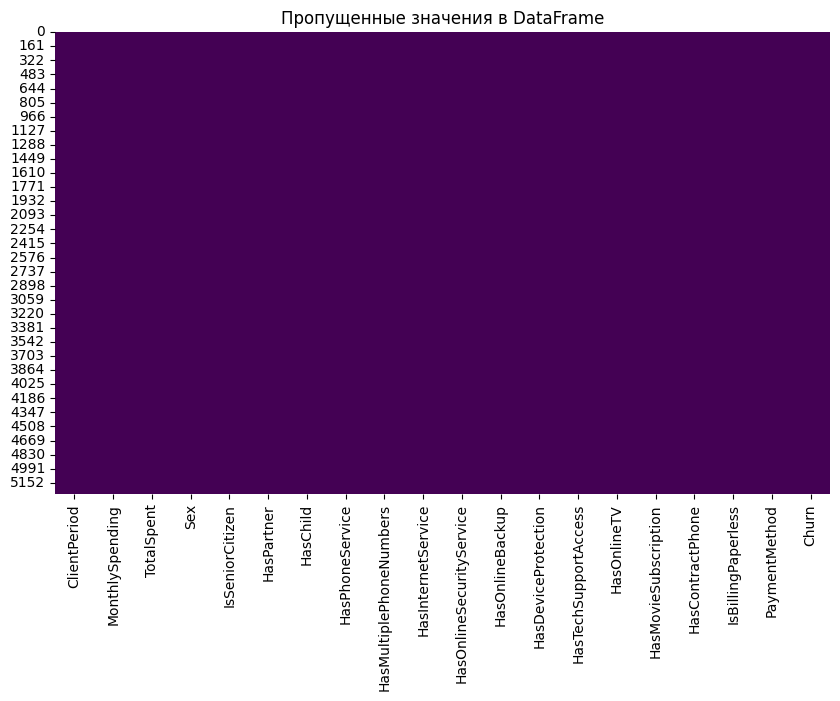

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


missing_matrix = data_train.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_matrix, cbar=False, cmap='viridis')
plt.title('Пропущенные значения в DataFrame')
plt.show()

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

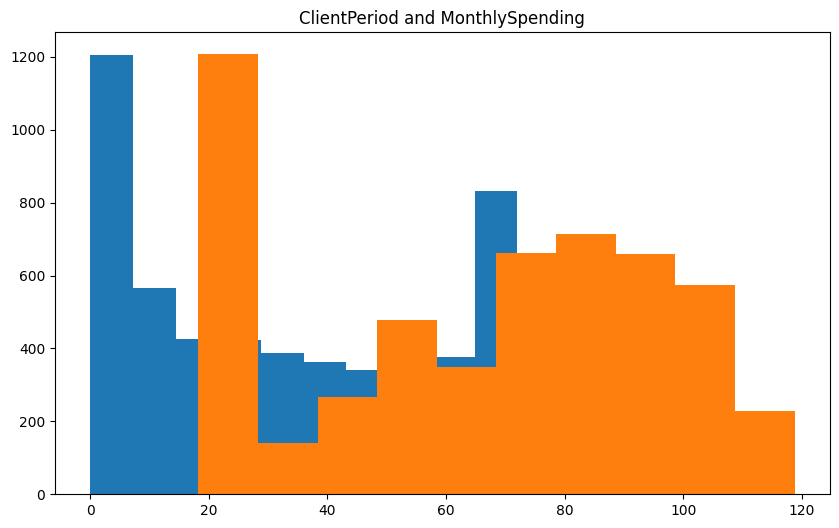

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 6))
plt.hist(data_train["ClientPeriod"])
plt.hist(data_train["MonthlySpending"])
plt.title("ClientPeriod and MonthlySpending")
plt.show()

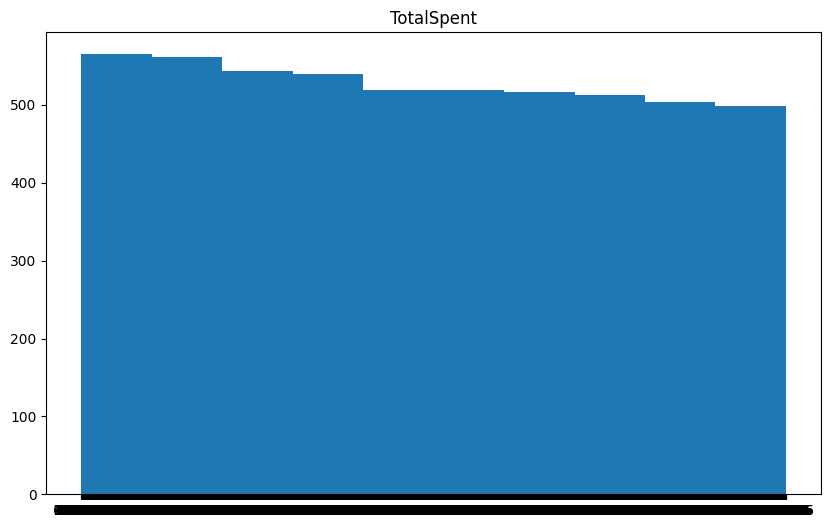

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(data_train["TotalSpent"])
plt.title("TotalSpent")
plt.show()

<ipython-input-17-e79ecec6e4d8>:7: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


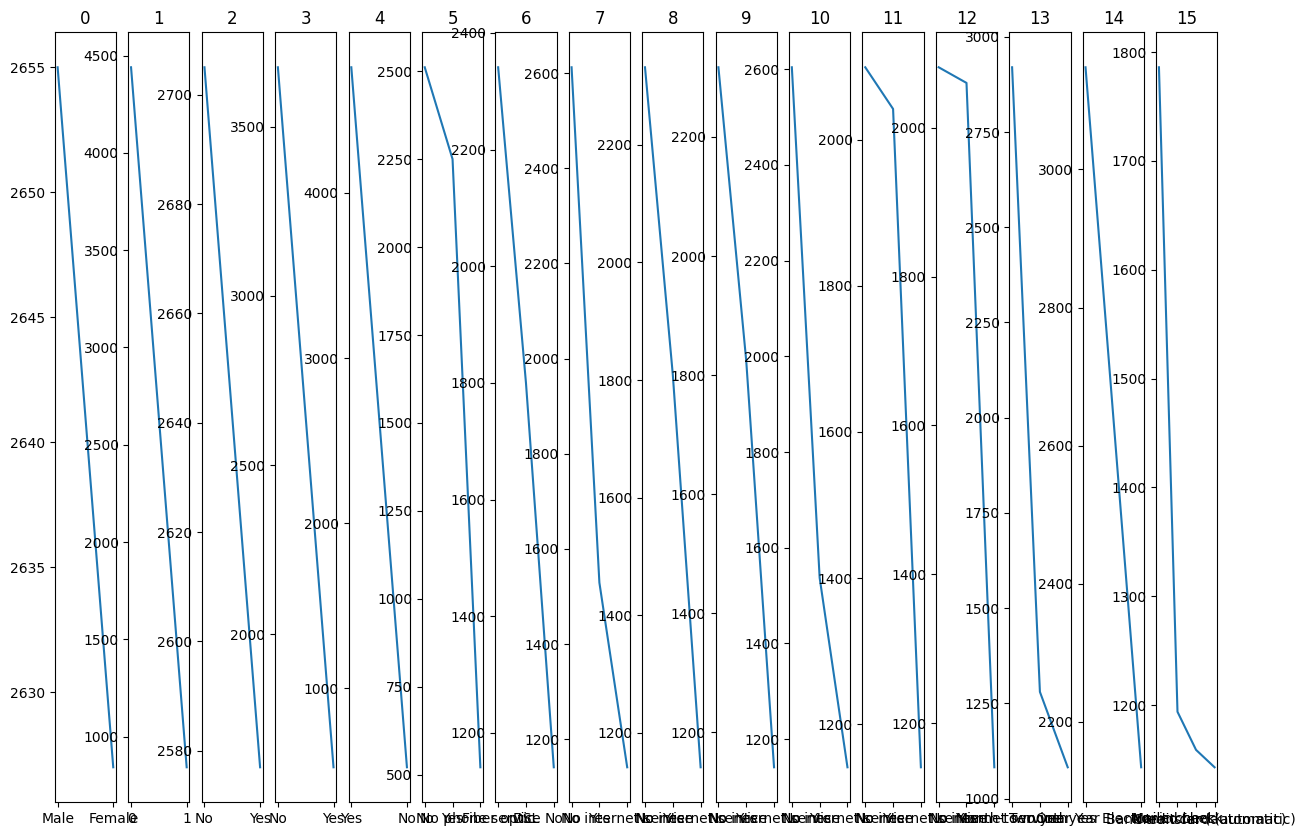

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(15, 10))

for i in range(len(cat_cols)):
  axes[i].plot(data_train[cat_cols[i]].value_counts())
  axes[i].set_title(i)

plt.tight_layout()
plt.show()

In [ ]:
# YOUR CODE

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
cat_data_train = data_train[cat_cols]
cat_data_test = data_test[cat_cols]

In [ ]:
dummy_features_train = pd.get_dummies(cat_data_train)
dummy_features_test = pd.get_dummies(cat_data_test)

In [ ]:
num_data_train = data_train[num_cols]
num_data_test = data_test[num_cols]

In [ ]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [ ]:
num_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


In [ ]:
X_train = pd.concat([num_data_train, dummy_features_train], axis = 1)
X_origin_train = data_train.iloc[:, :-1]

Y_train = data_train["Churn"]

X_test = pd.concat([num_data_test, dummy_features_test], axis = 1)
X_origin_test = data_test.iloc[:, :-1]


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(5282, 45)
(5282,)
(1761, 45)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   object 
 3   IsSeniorCitizen                               5282 non-null   int64  
 4   Sex_Female                                    5282 non-null   bool   
 5   Sex_Male                                      5282 non-null   bool   
 6   HasPartner_No                                 5282 non-null   bool   
 7   HasPartner_Yes                                5282 non-null   bool   
 8   HasChild_No                                   5282 non-null   bool   
 9   HasChild_Yes                                  5282 non-null   b

In [ ]:
c = 0

for i in range(5282):
  if X_train[num_cols[-1]][i] == " ":
    c += 1
    X_train.drop(i, inplace=True)
    Y_train.drop(i, inplace = True)
print(c)

9


In [ ]:
c = 0

for i in range(1761):
  if X_test["TotalSpent"][i] == " ":
    c += 1
    X_test.drop(i, inplace=True)
print(c)

2


In [ ]:
X_train["TotalSpent"] = X_train["TotalSpent"].astype(float)
X_test["TotalSpent"] = X_test["TotalSpent"].astype(float)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1759 entries, 0 to 1760
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  1759 non-null   float64
 1   MonthlySpending                               1759 non-null   float64
 2   TotalSpent                                    1759 non-null   float64
 3   IsSeniorCitizen                               1759 non-null   int64  
 4   Sex_Female                                    1759 non-null   bool   
 5   Sex_Male                                      1759 non-null   bool   
 6   HasPartner_No                                 1759 non-null   bool   
 7   HasPartner_Yes                                1759 non-null   bool   
 8   HasChild_No                                   1759 non-null   bool   
 9   HasChild_Yes                                  1759 non-null   bool  

In [ ]:
scaler = StandardScaler()


X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [ ]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1,1.612060,-1.295997,-0.184763,0,False,True,False,True,True,False,...,False,False,False,True,True,False,False,True,False,False
2,-1.282072,0.362658,-0.976504,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,-0.018437,0.475334,0.122800,1,True,False,False,True,True,False,...,False,True,False,False,True,False,False,False,False,True
4,1.122911,1.666716,1.968909,0,True,False,False,True,False,True,...,True,False,False,True,True,False,False,True,False,False


In [ ]:
X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.393452,-0.275902,0.056553,0,False,True,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,-0.135507,1.146742,0.329711,1,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
2,-0.949290,0.400190,-0.696591,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,1.410680,0.324695,1.154651,0,True,False,False,True,False,True,...,False,False,False,True,True,False,False,True,False,False
4,1.573437,-1.483807,-0.384735,0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5273 non-null   float64
 1   MonthlySpending                               5273 non-null   float64
 2   TotalSpent                                    5273 non-null   float64
 3   IsSeniorCitizen                               5273 non-null   int64  
 4   Sex_Female                                    5273 non-null   bool   
 5   Sex_Male                                      5273 non-null   bool   
 6   HasPartner_No                                 5273 non-null   bool   
 7   HasPartner_Yes                                5273 non-null   bool   
 8   HasChild_No                                   5273 non-null   bool   
 9   HasChild_Yes                                  5273 non-null   bool  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train.values, Y_train.values,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
model = LogisticRegressionCV(
    Cs=[100, 10, 1, 0.1, 0.01, 0.001],
    cv=5,
    scoring='roc_auc',
    solver='liblinear',
    penalty='l2',
    refit=True,
    random_state=42,
    max_iter=800,
)
model.fit(x_train, y_train)

print(f"Лучший C: {model.C_[0]}")
y_pred_proba = model.predict_proba(x_test)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Лучший C: 10.0
ROC-AUC: 0.8440


In [ ]:

!pip install xgboost -q
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
# Бустеры
import catboost # документация: https://catboost.ai/docs
import xgboost

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
boosting_model0 = xgboost.XGBClassifier(n_estimators=500)

boosting_model0.fit(x_train, y_train)

y_train_predicted = boosting_model0.predict_proba(x_train)[:, 1]
y_test_predicted = boosting_model0.predict_proba(x_test)[:, 1]

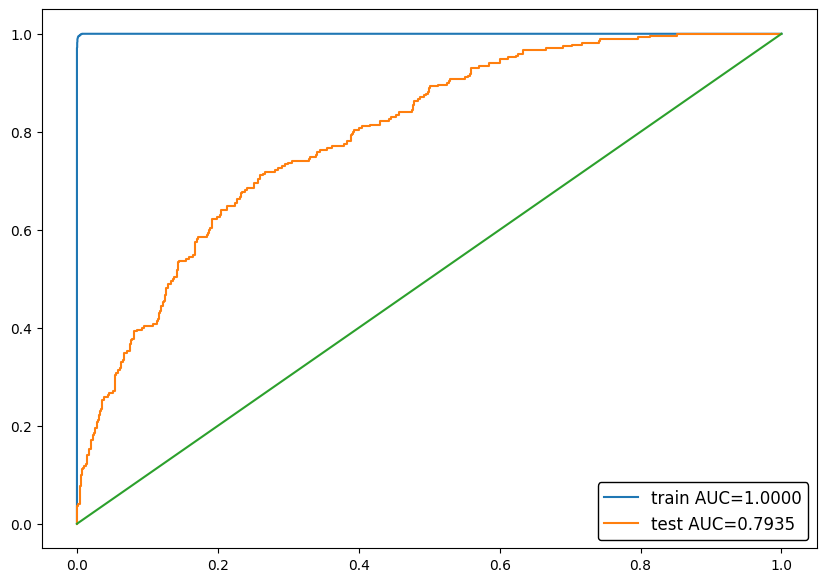

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
X_origin_TRAIN, X_origin_TEST, _1, _2 = train_test_split(X_origin_train.values, data_train["Churn"].values,
                                                       train_size=0.8,
                                                       random_state=42)

In [ ]:
X_origin_TRAIN.shape

(4225, 19)

In [ ]:
X_origin_TRAIN = pd.DataFrame(X_origin_TRAIN, columns=data_train.iloc[ :, :-1].columns)
X_origin_TEST = pd.DataFrame(X_origin_TEST, columns=data_train.iloc[ :, :-1].columns)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=cat_cols)

boosting_model.fit(X_origin_TRAIN, _1)

y_train_predicted = boosting_model.predict_proba(X_origin_TRAIN)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_origin_TEST)[:, 1]

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 18.5ms	remaining: 3.68s
1:	learn: 0.5970973	total: 31.7ms	remaining: 3.14s
2:	learn: 0.5610080	total: 45.5ms	remaining: 2.98s
3:	learn: 0.5329491	total: 60.5ms	remaining: 2.96s
4:	learn: 0.5112068	total: 75ms	remaining: 2.92s
5:	learn: 0.4930985	total: 89.1ms	remaining: 2.88s
6:	learn: 0.4800850	total: 100ms	remaining: 2.76s
7:	learn: 0.4681540	total: 116ms	remaining: 2.79s
8:	learn: 0.4583285	total: 130ms	remaining: 2.76s
9:	learn: 0.4494858	total: 145ms	remaining: 2.76s
10:	learn: 0.4439489	total: 160ms	remaining: 2.74s
11:	learn: 0.4371125	total: 176ms	remaining: 2.75s
12:	learn: 0.4311122	total: 191ms	remaining: 2.75s
13:	learn: 0.4264039	total: 216ms	remaining: 2.87s
14:	learn: 0.4222915	total: 232ms	remaining: 2.86s
15:	learn: 0.4190003	total: 247ms	remaining: 2.85s
16:	learn: 0.4153313	total: 262ms	remaining: 2.81s
17:	learn: 0.4132986	total: 275ms	remaining: 2.78s
18:	learn: 0.4116653	total: 287ms	remaining: 2.74s
19:	lea

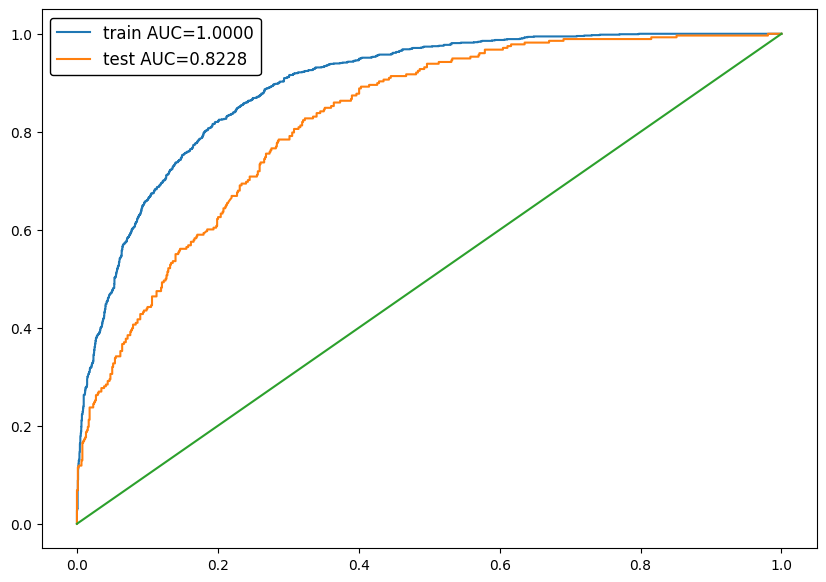

In [ ]:
rain_auc = roc_auc_score(_1, y_train_predicted)
test_auc = roc_auc_score(_2, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(_1, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(_2, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Итог

была проведена полная подготовка датасета. обучены 3 модели с использованием LogisticRegressionCV, xgboost и catboost. лучшую точность показала первая модель с парматером c = 10.(ROC-AUC: 0.844)